 ### predicting turbine energy yield (TEY) using ambient variables as features.


In [6]:
#Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
gas = pd.read_csv('gas_turbines.csv')
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [12]:
import sweetviz as sv
my_report=sv.analyze(gas)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
import pandas_profiling as pp
profile = pp.ProfileReport(gas)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [15]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [16]:
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [17]:
gas['TEY']

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

C:\Users\Vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

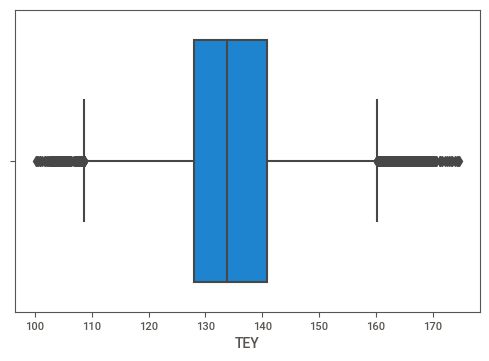

In [18]:
#Visualization of taget columns with box plot
sns.boxplot(gas.TEY)
plt.show

In [19]:
# Changing position of target column 'TEY'
Target = gas['TEY']
#Drop the existing column
gas.drop(labels=['TEY'], axis=1,inplace = True)
gas.insert(0, 'Y', Target)

gas= gas.rename({'Y':'TEY'}, axis = 1)

gas.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [20]:
x= gas.iloc[:,1:]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [21]:
y= gas.loc[:,['TEY']]
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [22]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

In [23]:
x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [24]:
y

array([[-1.23117246],
       [-1.22990897],
       [-1.23054071],
       ...,
       [-1.5160891 ],
       [-1.48134317],
       [-1.42827666]])

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import KFold

In [26]:
from keras.models import Sequential
def baseline_model():
    model = Sequential()
    model.add(Dense(10,input_dim=10, kernel_initializer='he_uniform',activation="tanh"))
    model.add(Dense(6,kernel_initializer='he_uniform',activation="tanh"))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [27]:
from sklearn.model_selection import cross_val_score
%matplotlib inline

estimator = KerasRegressor(build_fn=baseline_model,nb_epoch=50,batch_size=100, verbose=True)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)

C:\Users\Vicky\AppData\Local\Temp\ipykernel_5396\2208709731.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model,nb_epoch=50,batch_size=100, verbose=True)


16/16 [==============================] - 0s 4ms/step - loss: 0.1340


In [28]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.18 (0.10) MSE


In [29]:
estimator.fit(x,y)
prediction=estimator.predict(x)
prediction

151/151 [==============================] - 1s 5ms/step


array([-0.9443842 , -0.95474625, -0.96313363, ..., -0.9700411 ,
       -1.007202  , -0.99322927], dtype=float32)

In [30]:
X = gas.drop(columns = ['TEY'], axis = 1) 
y = gas.iloc[:,7]

In [31]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [32]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [34]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 7s - loss: 59991.9531 - mean_squared_error: 59991.9531 - val_loss: 3007.3640 - val_mean_squared_error: 3007.3640 - 7s/epoch - 18ms/step
Epoch 2/100
381/381 - 3s - loss: 1880.0641 - mean_squared_error: 1880.0641 - val_loss: 1534.8568 - val_mean_squared_error: 1534.8568 - 3s/epoch - 7ms/step
Epoch 3/100
381/381 - 2s - loss: 967.3812 - mean_squared_error: 967.3812 - val_loss: 859.1565 - val_mean_squared_error: 859.1565 - 2s/epoch - 5ms/step
Epoch 4/100
381/381 - 2s - loss: 547.0001 - mean_squared_error: 547.0001 - val_loss: 481.5305 - val_mean_squared_error: 481.5305 - 2s/epoch - 6ms/step
Epoch 5/100
381/381 - 2s - loss: 306.7445 - mean_squared_error: 306.7445 - val_loss: 265.6712 - val_mean_squared_error: 265.6712 - 2s/epoch - 5ms/step
Epoch 6/100
381/381 - 2s - loss: 170.9687 - mean_squared_error: 170.9687 - val_loss: 143.4343 - val_mean_squared_error: 143.4343 - 2s/epoch - 6ms/step
Epoch 7/100
381/381 - 3s - loss: 92.9758 - mean_squared_error: 92.9758 - val_loss: 

In [39]:
predictions = model.predict_on_batch(X_test_scaled)

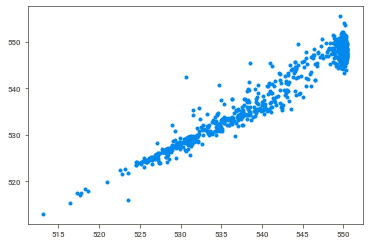

In [40]:
plt.scatter(y_test, predictions)
plt.show()

In [41]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,550.25,548.704346,0.280900
1,549.94,548.919861,0.185500
2,549.62,549.586975,0.006009
3,549.96,547.911377,0.372504
4,550.01,549.259888,0.136382
...,...,...,...
1499,550.13,548.665955,0.266127
1500,540.98,545.424927,0.821643
1501,528.33,526.329468,0.378652
1502,550.00,548.228027,0.322177
